In [61]:
from keras import models, layers, losses, optimizers, activations, metrics, regularizers
import pandas as pd
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [62]:
def plot_graphs(history, metric, size):
  plt.plot(history.history[metric][-size:])
  plt.plot(history.history['val_'+metric][-size:], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])


Fetching the data

In [63]:
df = pd.read_csv("data.csv")
# print(df.info())
df.tail(5)

,X,Y,Previous_X,Previous_Y,X_velocity,Spike_0,Spike_1,Spike_2,Spike_3,Spike_4,Spike_5,Spike_6,Spike_7,Spike_8,Spike_9,Spike_10,Spike_11,Jump
35299,53.0,207.1,60.0,212.0,-7.0,0,0,1,1,1,1,1,1,1,0,1,0,0
35300,46.0,202.5,53.0,207.1,-7.0,0,0,1,1,1,1,1,1,1,0,1,0,0
35301,39.0,198.2,46.0,202.5,-7.0,0,0,1,1,1,1,1,1,1,0,1,0,0
35302,32.0,194.2,39.0,198.2,-7.0,0,0,1,1,1,1,1,1,1,0,1,0,0
35303,25.0,190.5,32.0,194.2,-7.0,0,0,1,1,1,1,1,1,1,0,1,0,0


In [64]:
outputs = df["Jump"]
inputs = df.drop(["Jump"],axis=1)
train_inp = inputs[:-1000]
test_inp = inputs[-1000:]
train_out = outputs[:-1000]
test_out = outputs[-1000:]

Creating neural network

In [65]:
model = models.Sequential()

model.add(layers.Dense(17, activation=activations.linear, input_shape=(17,)))
model.add(layers.LeakyReLU())

model.add(layers.Dense(34, activation=activations.linear))
model.add(layers.LeakyReLU())

model.add(layers.Dense(1, activation=activations.sigmoid))


Model Training

In [66]:
NUM_EPOCHS = 200 
model.compile(
    optimizer=optimizers.Adam(),
    loss=losses.BinaryCrossentropy(),
    metrics=metrics.BinaryAccuracy(threshold=0.01),
)
history = model.fit(train_inp, train_out, epochs=NUM_EPOCHS, verbose=1, validation_split=0.1,
                    validation_steps=30)
# 100 epochs -> 42s

Epoch 1/200
965/965 [==============================] - 4s 3ms/step - loss: 1.1854 - binary_accuracy: 0.6198 - val_loss: 0.1194 - val_binary_accuracy: 0.2673
Epoch 2/200
965/965 [==============================] - 3s 3ms/step - loss: 0.1524 - binary_accuracy: 0.5608 - val_loss: 0.1341 - val_binary_accuracy: 0.6724
Epoch 3/200
965/965 [==============================] - 3s 3ms/step - loss: 0.1489 - binary_accuracy: 0.5680 - val_loss: 0.1165 - val_binary_accuracy: 0.4500
Epoch 4/200
965/965 [==============================] - 4s 4ms/step - loss: 0.1443 - binary_accuracy: 0.5814 - val_loss: 0.1577 - val_binary_accuracy: 0.9225
Epoch 5/200
965/965 [==============================] - 4s 4ms/step - loss: 0.1544 - binary_accuracy: 0.6015 - val_loss: 0.1594 - val_binary_accuracy: 0.9510
Epoch 6/200
965/965 [==============================] - 6s 6ms/step - loss: 0.1381 - binary_accuracy: 0.5666 - val_loss: 0.1534 - val_binary_accuracy: 0.9335
Epoch 7/200
965/965 [==============================] - 5s 

Evaluate and save model


In [ ]:
test_loss, test_acc = model.evaluate(test_inp, test_out)

32/32 [==============================] - 0s 2ms/step - loss: 0.1061 - binary_accuracy: 0.9780


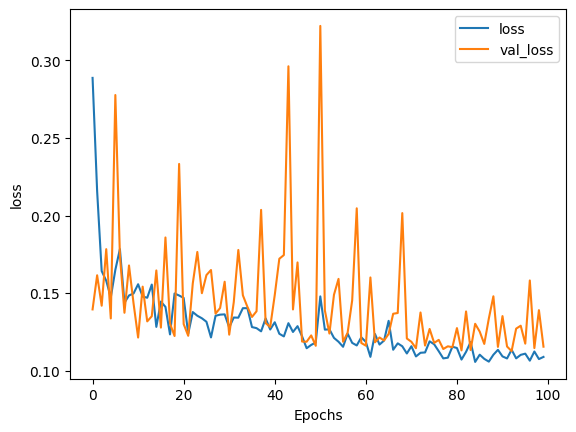

In [ ]:
plot_graphs(history, 'loss', 150)

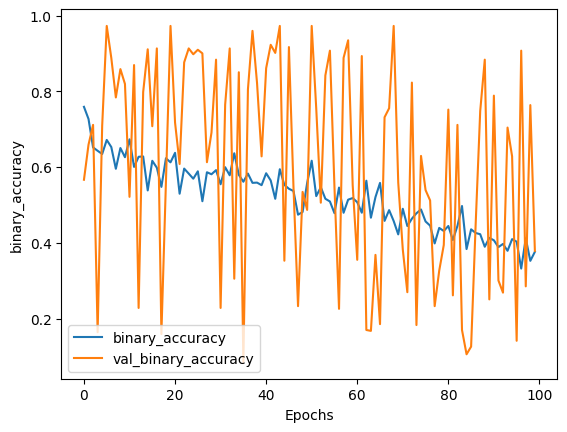

In [ ]:
plot_graphs(history, 'binary_accuracy', 150)

In [ ]:
model.save("my_model")

INFO:tensorflow:Assets written to: my_model\assets


In [ ]:
one_df = df[:2].drop(["Jump"],axis=1)
sub_df = df[df["Jump"]==0].drop(["Jump"], axis=1)
# max(model.predict(sub_df))
x = model.predict(one_df)

print(x)
print(type(x))

1/1 [==============================] - 0s 20ms/step
[[0.03891682]
 [0.03891682]]
<class 'numpy.ndarray'>


In [ ]:
copy_df = df.copy()
copy_df = copy_df.drop(["Jump"],axis=1)
copy_df["pred"] = model.predict(copy_df)
copy_df["Jump"] = df["Jump"]
copy_df

295/295 [==============================] - 1s 2ms/step


,X,Y,Previous_X,Previous_Y,X_velocity,Spike_0,Spike_1,Spike_2,Spike_3,Spike_4,Spike_5,Spike_6,Spike_7,Spike_8,Spike_9,Spike_10,Spike_11,pred,Jump
0,219.0,439.0,219.0,439.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.038917,0
1,219.0,439.0,219.0,439.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.038917,0
2,223.0,432.3,219.0,439.0,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.020439,0
3,227.0,425.9,223.0,432.3,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.021292,0
4,231.0,419.8,227.0,425.9,4.0,0,0,0,0,0,0,0,0,0,0,0,0,0.022182,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9408,385.0,578.8,378.0,570.8,7.0,0,0,1,1,1,1,1,1,0,1,1,0,0.063998,1
9409,392.0,571.8,385.0,578.8,7.0,0,0,1,1,1,1,1,1,0,1,1,0,0.010708,0
9410,399.0,565.1,392.0,571.8,7.0,0,0,1,1,1,1,1,1,0,1,1,0,0.011210,0
9411,406.0,558.7,399.0,565.1,7.0,0,0,1,1,1,1,1,1,0,1,1,0,0.011736,0


In [ ]:
print(roc_auc_score(copy_df["Jump"], copy_df["pred"]))
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(copy_df["Jump"], copy_df["pred"])

0.8040671169149308


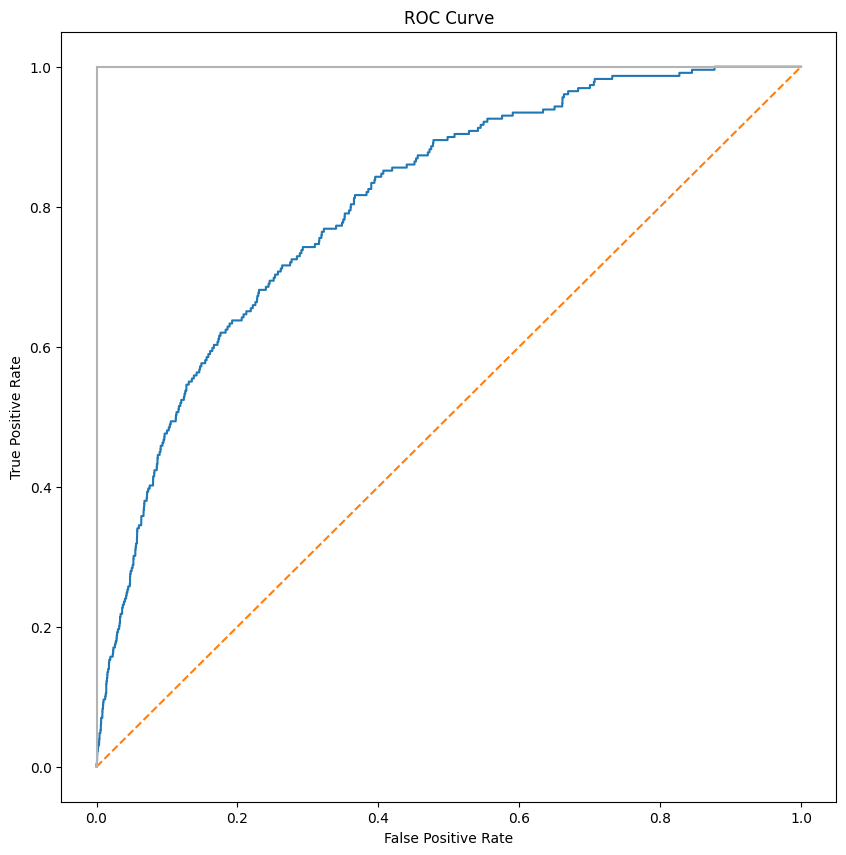

In [ ]:
plt.subplots(1, figsize=(10,10))
plt.title("ROC Curve")
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
